<p> Dataset de calidad de vinos </p>
<p>1 - fixed acidity<br>
   2 - volatile acidity<br>
   3 - citric acid<br>
   4 - residual sugar<br>
   5 - chlorides<br>
   6 - free sulfur dioxide<br>
   7 - total sulfur dioxide<br>
   8 - density<br>
   9 - pH<br>
   10 - sulphates<br>
   11 - alcohol<br><br>
   Output variable (based on sensory data):<br> 
   12 - quality (score between 0 and 10)</p>
   
<p>Cita:<br>
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.<br> 
Modeling wine preferences by data mining from physicochemical properties.<br>
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.</p>


!pip install --upgrade scikit-learn
!pip install yellowbrick

In [3]:
#Importing required packages.
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import numpy as np
import matplotlib.pyplot as plt # libreria para visualizacion
import seaborn as sns # complementa a matplotlib 


In [5]:
# Carguemos el dataset
wine = pd.read_csv('winequality-red.csv')

In [6]:
# Revisemos el dataset
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# Informacion sobre las columnas
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Hagamos analisis de datos exploratorio

Por lo general queremos ver tres cosas:
    1. Distribucion de cada variable
    2. Comparativo de variable objetivo contra variables predictivas
    3. Correlacion entre todas las variables
    
Esto nos permite tomar decisiones en cuando a las transformaciones requeridas para un mejor modelo

#### Grafiquemos la distribucion de las variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


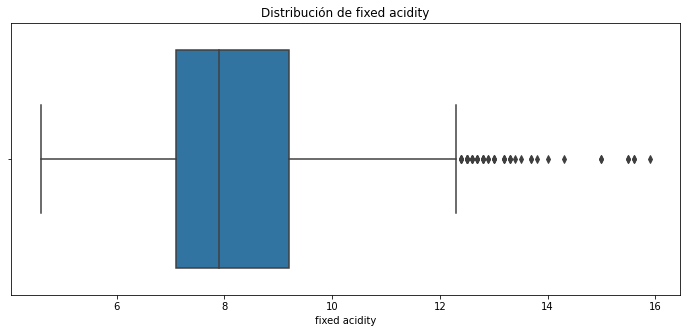

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


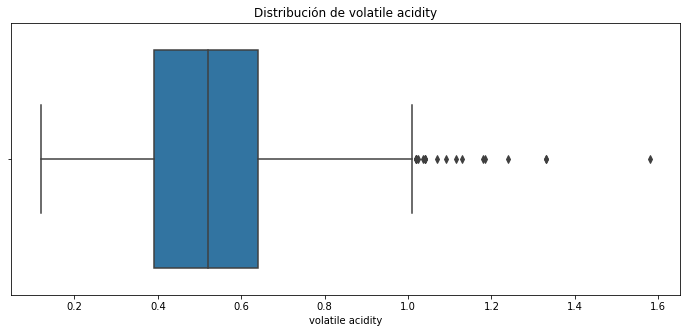

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


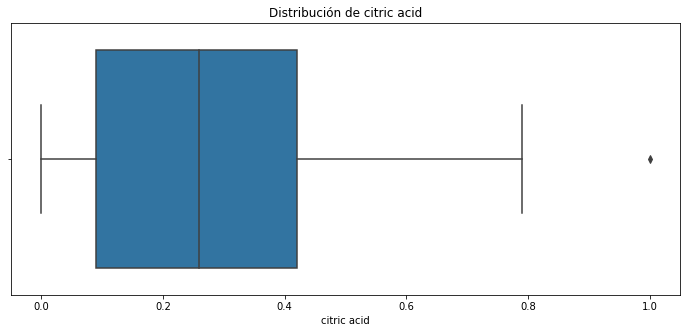

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


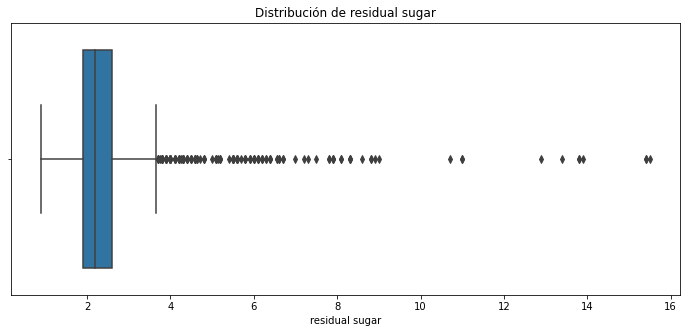

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


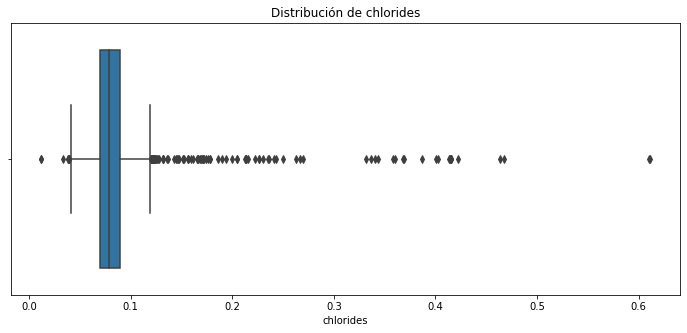

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


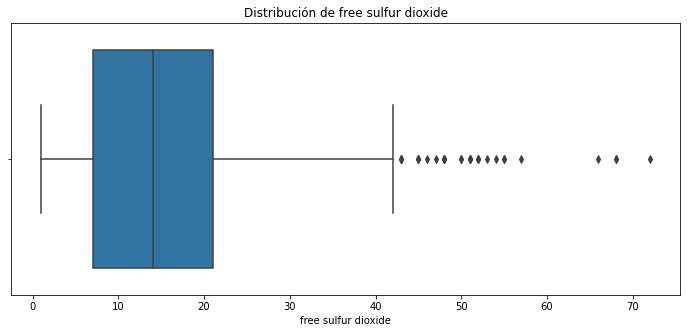

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


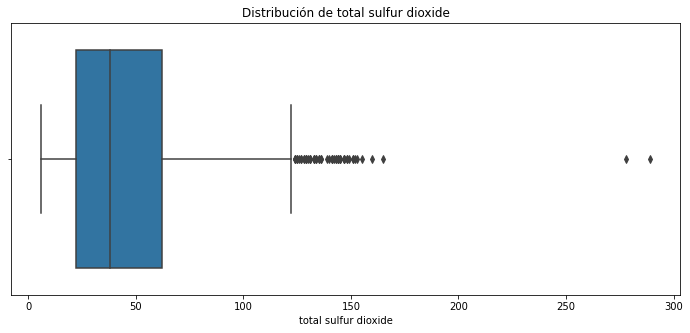

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


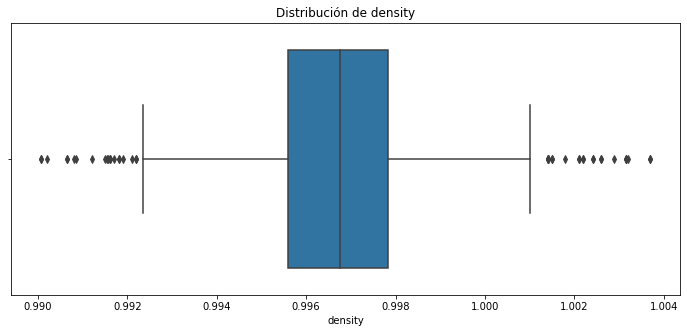

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


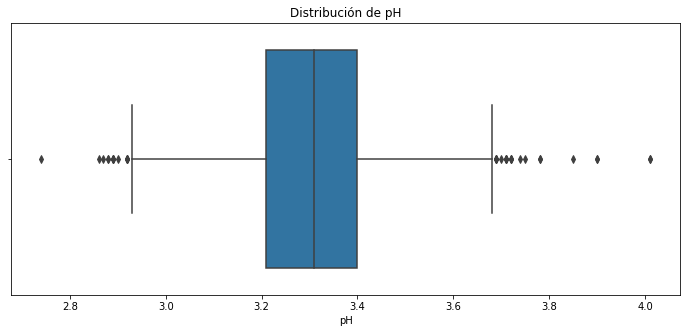

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


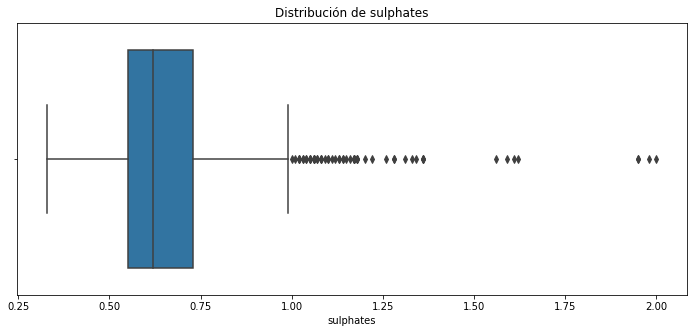

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


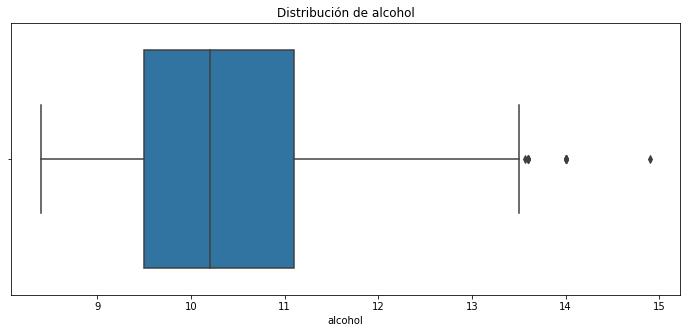

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


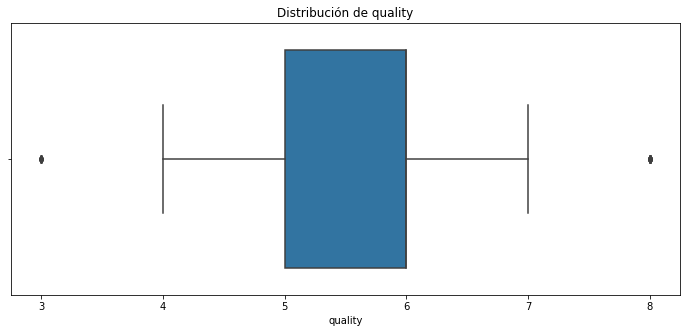

In [8]:
# Funcion para graficar distribucion
def getBoxplot(data, col):

    # Crear figura y establecer su tamaño
    fig, ax = plt.subplots(figsize=(12,5))

    # Genera un boxplot para cada variable del dataset
    sns.boxplot(data[col], ax=ax)
    
    # Asigna titulo a cada grafico
    plt.title(f"Distribución de {col}")
    
    # Muestra grafico
    plt.show()

    
# Bucle para graficar la distribucion de todas las variables utilizando funcion getBoxplot
for col in wine.columns:
    getBoxplot(wine, col)


#### Grafiquemos todas las variables contra nuestra variable objetivo: quality

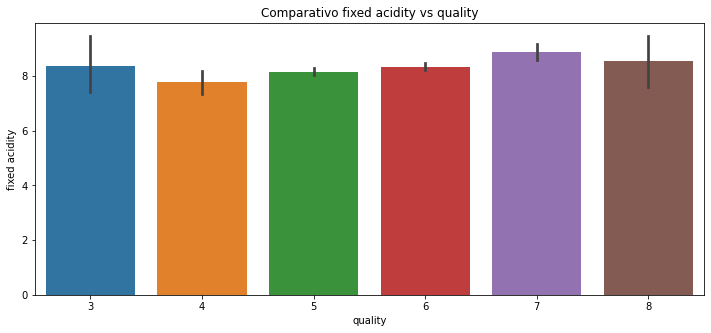

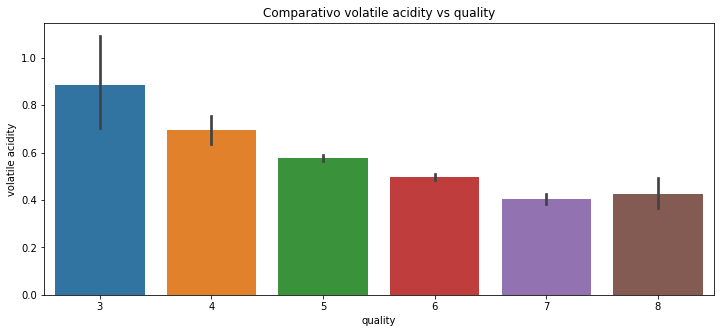

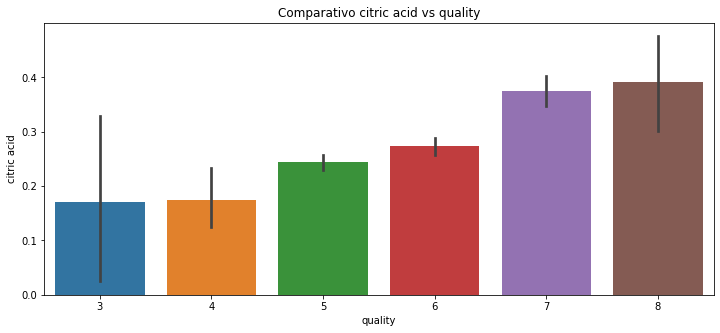

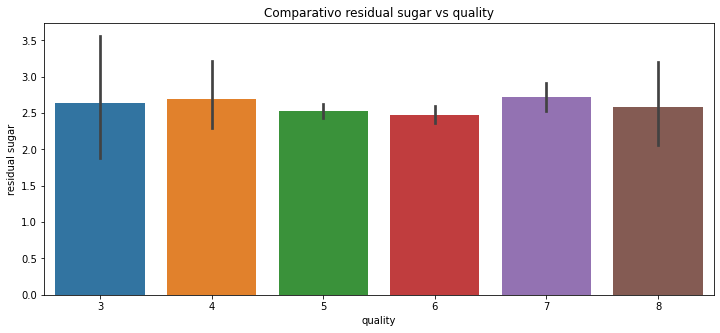

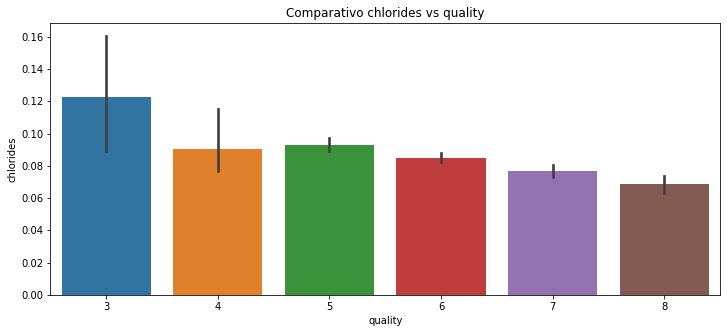

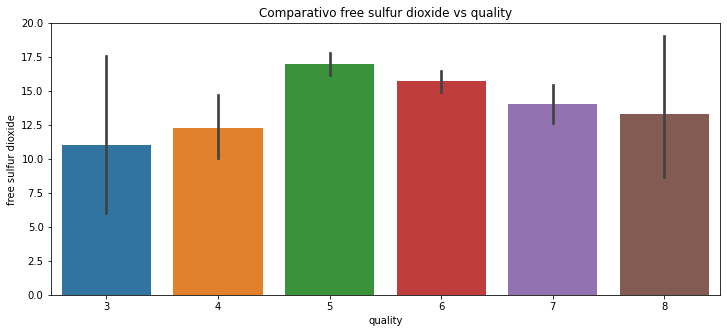

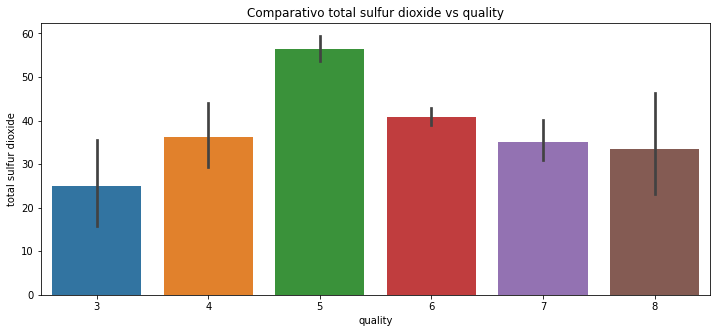

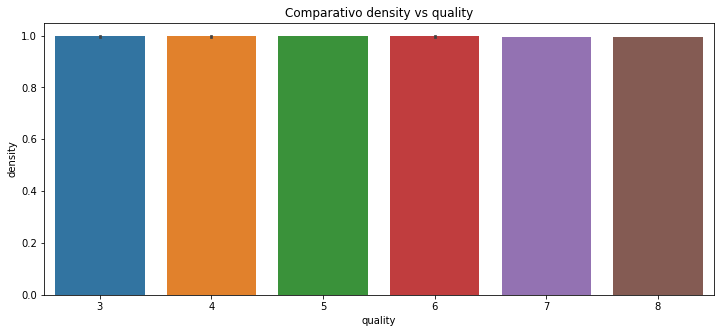

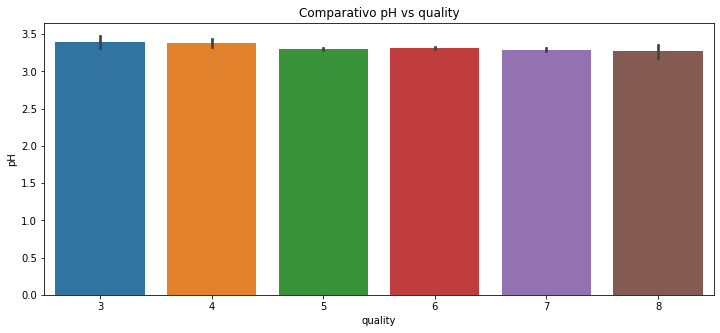

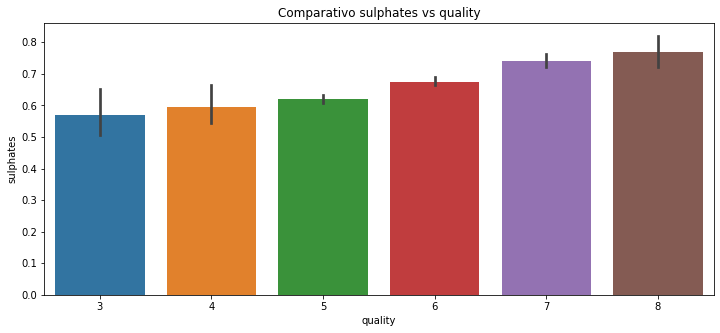

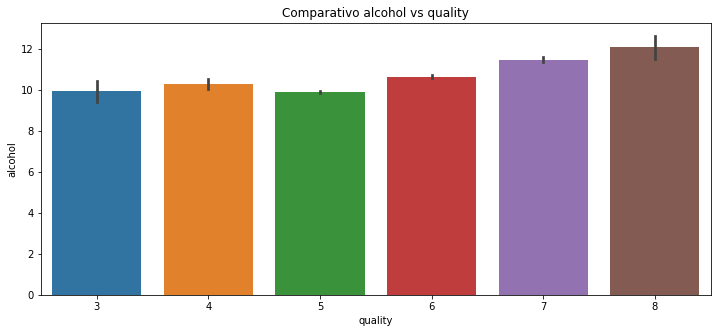

In [9]:
# Funcion para graficar distribucion
def getBarplot(data, col, objetivo = 'quality'):
    
    # Crear figura y establecer su tamaño
    fig, ax = plt.subplots(figsize=(12,5))
    
    # Genera un grafico de barras contra variable objetivo
    sns.barplot(x = objetivo, y = col, data = data, ax=ax)
    
    # Asigna titulo a cada grafico
    plt.title(f"Comparativo {col} vs {objetivo}")
    
    # Muestra grafico
    plt.show()

    
# Bucle para graficar la distribucion de todas las variables utilizando funcion getBoxplot
for col in wine.columns:
    if col != "quality":
        getBarplot(wine, col)


#### Grafiquemos la matriz de correlacion

In [10]:
# Crear tabla de correlacion
corr = wine.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


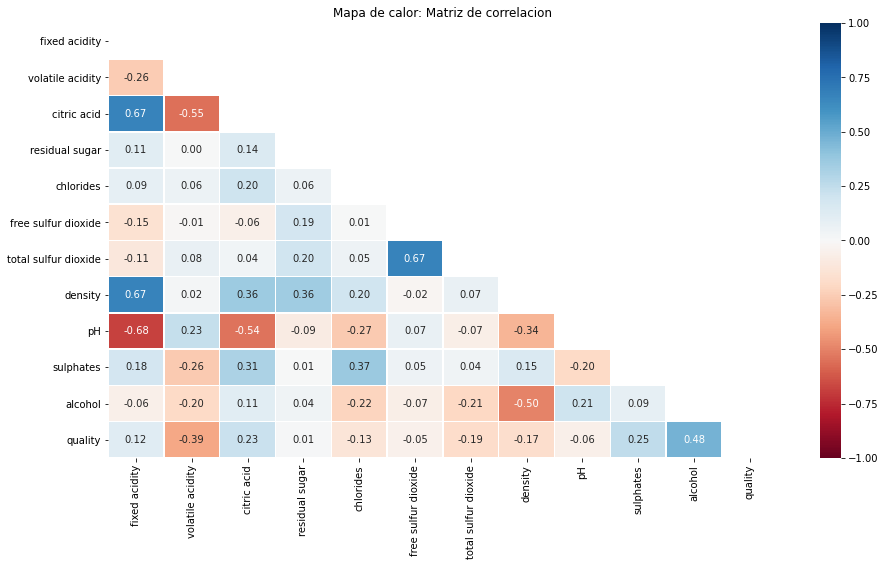

In [11]:
# Grafiquemos la matriz de correlacion para tener un 
fig, ax = plt.subplots(figsize=(15,8))

# Preparacion de datos para mostrar triangulo inferior
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Crear heatmap con matriz de correlacion
sns.heatmap(corr, vmin=-1, vmax=1, cmap="RdBu", annot=True, linewidths=.5, fmt=".2f", mask=mask)

# Asignar titulo al grafico
ax.set_title("Mapa de calor: Matriz de correlacion")

plt.show()

In [16]:
# Creacion de ratios

wine["Residual sugar/volatile acidity"] = wine['residual sugar']/wine['volatile acidity'] # No existe correlacion entre las variables
wine["pH/fixed acidity"] = wine['pH']/wine['fixed acidity'] # Existe correlacion fuerte negativa entre las variables
wine["Total sulfur dioxide/free sulfor dioxide"] = wine['total sulfur dioxide']/wine['free sulfur dioxide'] # Existe correlacion fuerte positiva entre las variables

# Mostrar primeras filas

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Residual sugar/volatile acidity,pH/fixed acidity,Total sulfur dioxide/free sulfor dioxide
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2.714286,0.474324,3.090909
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2.954545,0.410256,2.680000
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,3.026316,0.417949,3.600000
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,6.785714,0.282143,3.529412
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2.714286,0.474324,3.090909


### Generemos unos modelos de regresion capaces de predecir la calidad del vino

#### Importemos algunos paquetes

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import scipy

In [44]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.2.post1.


#### Dividamos los datos en set de entrenamiento y validacion

In [79]:
# Asignar variable objetivo a "y" y variables predictivas a "X"
X = wine.drop(columns=['quality']) #, 'pH', 'free sulfur dioxide', 'residual sugar'])
y = wine['quality']

# Dividamos los datos en entrenamiento y validacion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Creemos una funcion para evaluar validez del modelo

In [46]:
from yellowbrick.regressor import ResidualsPlot

# Funcion que grafica diagnostico de regresion
def getDiagnosticsPlots(modelo, X, y):
    
    y_pred = modelo.predict(X)
    resid = y - y_pred

    # Instanciamos figura
    fig, ax = plt.subplots(figsize=(12,10), nrows=2, ncols=1)
    
    # Crear grafico de valores residuales
    ax[0].scatter(y_pred, resid)
    ax[0].set_xlabel("Predicted")
    ax[0].set_ylabel("Residuales")
    ax[0].set_title("Residual plot")

    # Crear grafico QQ Plot
    scipy.stats.probplot(pred_train, dist="norm", plot=ax[1])

    plt.show()


#### Primero intentemos generar algunos modelos sin preprocesar variables

R2 en datos de entrenamiento: 0.363
R2 en datos de validacion: 0.352


MSE en datos de entrenamiento: 0.412
MSE en datos de validacion: 0.429

Resultados con datos de entrenamiento



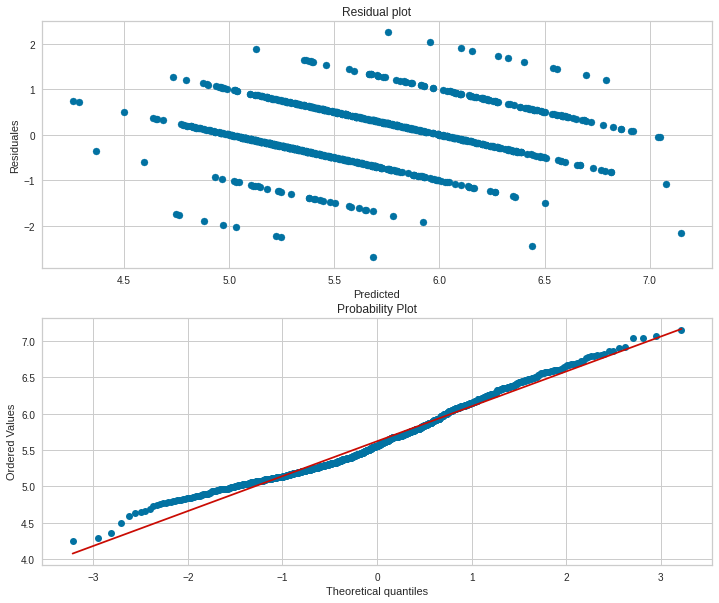


Resultados con datos de validacion



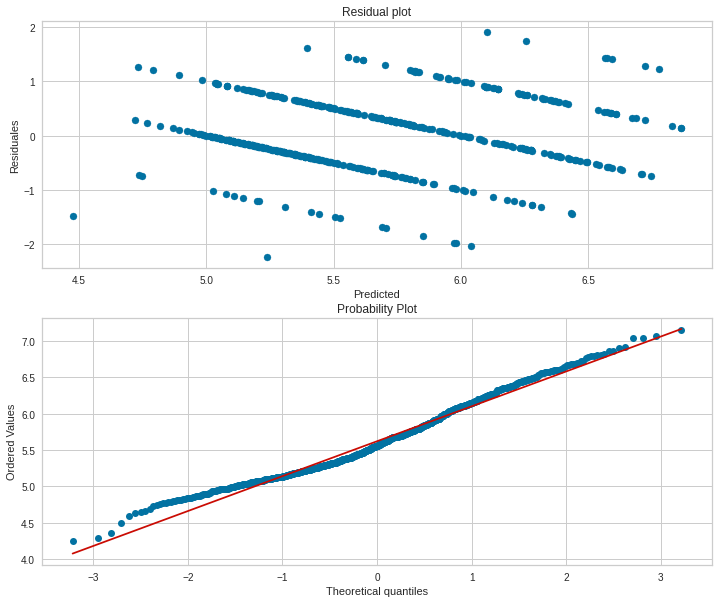

In [47]:
# Instanciamos regresion linear
reglin = LinearRegression()

# Ajustamos los datos a regresion linear
reglin.fit(X_train, y_train)

# Creamos predicciones sobre set de entrenamiento y validacion
pred_train = reglin.predict(X_train)
pred_test = reglin.predict(X_test)

# Calculamos metricas - r2
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)
print(f"R2 en datos de entrenamiento: {round(r2_train, 3)}")
print(f"R2 en datos de validacion: {round(r2_test, 3)}")

# Agregamos un espacio para claridad en resultados
print("\n")

# Calculamos metricas - mse
mse_train = mean_squared_error(y_train, pred_train)
mse_test =  mean_squared_error(y_test, pred_test)
print(f"MSE en datos de entrenamiento: {round(mse_train, 3)}")
print(f"MSE en datos de validacion: {round(mse_test, 3)}")
 
# Grafiquemos los resultados de la regresion
print("\nResultados con datos de entrenamiento\n")
getDiagnosticsPlots(reglin, X_train, y_train)

print("\nResultados con datos de validacion\n")
getDiagnosticsPlots(reglin, X_test, y_test)

In [49]:
df = X_test.copy()
df["target"]=y_test.values
df["pred"]=pred_test
df["resid"]=abs(df['target'] - df['pred'])
df.sort_values(by="resid", ascending = False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Residual sugar/volatile acidity,pH/fixed acidity,Total sulfur dioxide/free sulfor dioxide,target,pred,resid
1505,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,2.368421,0.529851,2.000000,3,5.238504,2.238504
813,6.9,0.390,0.24,2.1,0.102,4.0,7.0,0.99462,3.44,0.58,11.40,5.384615,0.498551,1.750000,4,6.040913,2.040913
1235,6.0,0.330,0.32,12.9,0.054,6.0,113.0,0.99572,3.30,0.56,11.50,39.090909,0.550000,18.833333,4,5.981474,1.981474
1239,6.5,0.670,0.00,4.3,0.057,11.0,20.0,0.99488,3.45,0.56,11.80,6.417910,0.530769,1.818182,4,5.971048,1.971048
495,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,7.428571,0.294393,3.200000,8,6.101360,1.898640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,7.6,0.685,0.23,2.3,0.111,20.0,84.0,0.99640,3.21,0.61,9.30,3.357664,0.422368,4.200000,5,4.989403,0.010597
83,7.3,0.670,0.26,1.8,0.401,16.0,51.0,0.99690,3.16,1.14,9.40,2.686567,0.432877,3.187500,5,4.991111,0.008889
1351,7.2,0.620,0.01,2.3,0.065,8.0,46.0,0.99332,3.32,0.51,11.80,3.709677,0.461111,5.750000,6,5.991978,0.008022
303,7.4,0.670,0.12,1.6,0.186,5.0,21.0,0.99600,3.39,0.54,9.50,2.388060,0.458108,4.200000,5,4.999869,0.000131


In [50]:
df.loc[df.target == 5, :].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Residual sugar/volatile acidity,pH/fixed acidity,Total sulfur dioxide/free sulfor dioxide,target,pred,resid
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0,217.000000,217.000000
mean,8.117972,0.568710,0.241106,2.417512,0.094258,16.944700,54.652074,0.997000,3.306129,0.619447,9.932719,4.527956,0.423722,3.579034,5.0,5.372371,0.383513
std,1.624380,0.156782,0.181056,0.965249,0.057578,11.122495,35.058812,0.001694,0.150351,0.159309,0.774231,1.978186,0.087506,1.909507,0.0,0.323584,0.310235
min,5.600000,0.240000,0.000000,1.300000,0.042000,3.000000,7.000000,0.992860,2.890000,0.370000,8.500000,1.278195,0.188387,1.333333,5.0,4.720547,0.000131
25%,7.000000,0.450000,0.100000,1.900000,0.073000,8.000000,25.000000,0.996000,3.190000,0.520000,9.400000,3.114754,0.364211,2.300000,5.0,5.136528,0.148816
50%,7.700000,0.585000,0.230000,2.200000,0.081000,15.000000,50.000000,0.996800,3.320000,0.590000,9.700000,4.000000,0.424675,3.000000,5.0,5.304587,0.304587
75%,8.900000,0.660000,0.350000,2.600000,0.093000,24.000000,77.000000,0.998000,3.390000,0.660000,10.200000,5.476190,0.484286,4.222222,5.0,5.535865,0.535865
max,15.500000,1.330000,0.790000,7.300000,0.464000,52.000000,155.000000,1.003150,3.720000,1.280000,13.000000,12.790698,0.664286,12.400000,5.0,6.437302,1.437302


In [51]:
pd.DataFrame({"vars" : X_test.columns, "coef" : reglin.coef_})

,vars,coef
0,fixed acidity,-0.073603
1,volatile acidity,-1.149232
2,citric acid,-0.192033
3,residual sugar,0.054188
4,chlorides,-1.716736
5,free sulfur dioxide,0.003524
6,total sulfur dioxide,-0.003083
7,density,-37.605450
8,pH,0.272435
9,sulphates,0.819921


R2 en datos de entrenamiento: 0.375
R2 en datos de validacion: 0.238


MSE en datos de entrenamiento: 0.404
MSE en datos de validacion: 0.505

Resultados con datos de entrenamiento



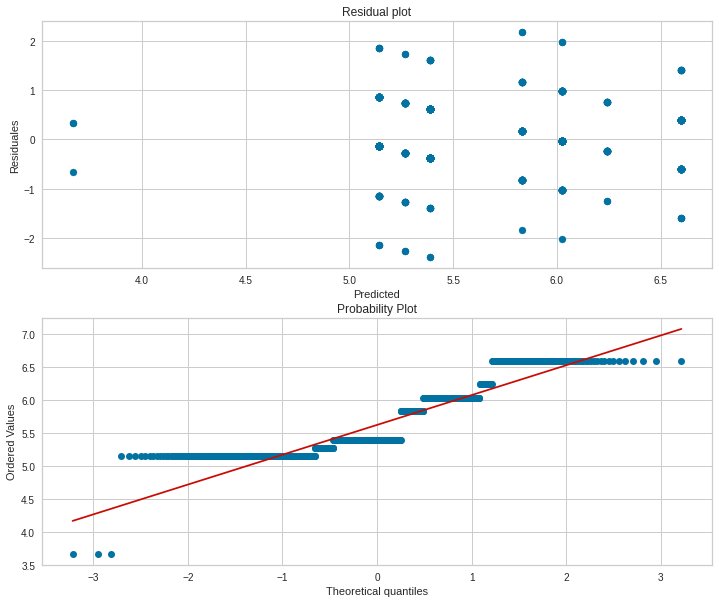


Resultados con datos de validacion



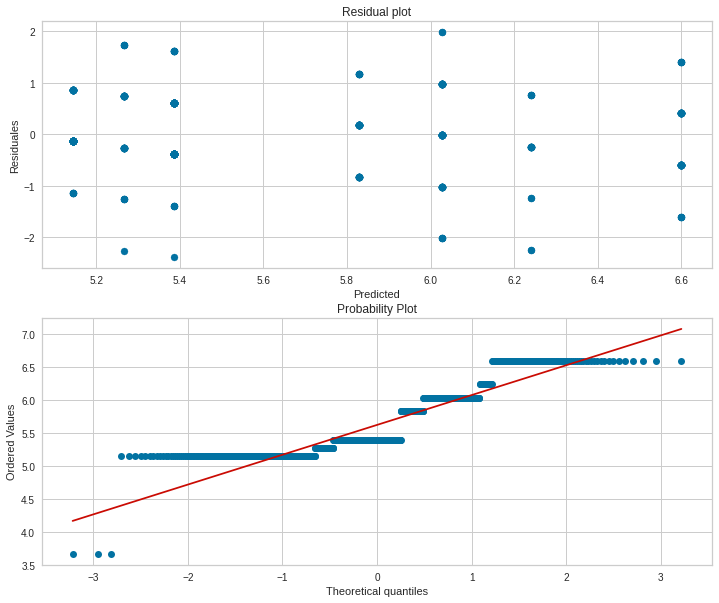

In [58]:
# Instanciamos regresion con arbol de decisiones
tree = DecisionTreeRegressor(random_state=42,max_depth=3) #, min_samples_split=10)

# Ajustamos los datos a regresion linear
tree.fit(X_train, y_train)

# Creamos predicciones sobre set de entrenamiento y validacion
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

# Calculamos metricas - r2
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)
print(f"R2 en datos de entrenamiento: {round(r2_train, 3)}")
print(f"R2 en datos de validacion: {round(r2_test, 3)}")

# Agregamos un espacio para claridad en resultados
print("\n")

# Calculamos metricas - mse
mse_train = mean_squared_error(y_train, pred_train)
mse_test =  mean_squared_error(y_test, pred_test)
print(f"MSE en datos de entrenamiento: {round(mse_train, 3)}")
print(f"MSE en datos de validacion: {round(mse_test, 3)}")

# Grafiquemos los resultados de la regresion
print("\nResultados con datos de entrenamiento\n")
getDiagnosticsPlots(tree, X_train, y_train)

print("\nResultados con datos de validacion\n")
getDiagnosticsPlots(tree, X_test, y_test)

R2 en datos de entrenamiento: 0.425
R2 en datos de validacion: 0.315


MSE en datos de entrenamiento: 0.371
MSE en datos de validacion: 0.454

Resultados con datos de entrenamiento



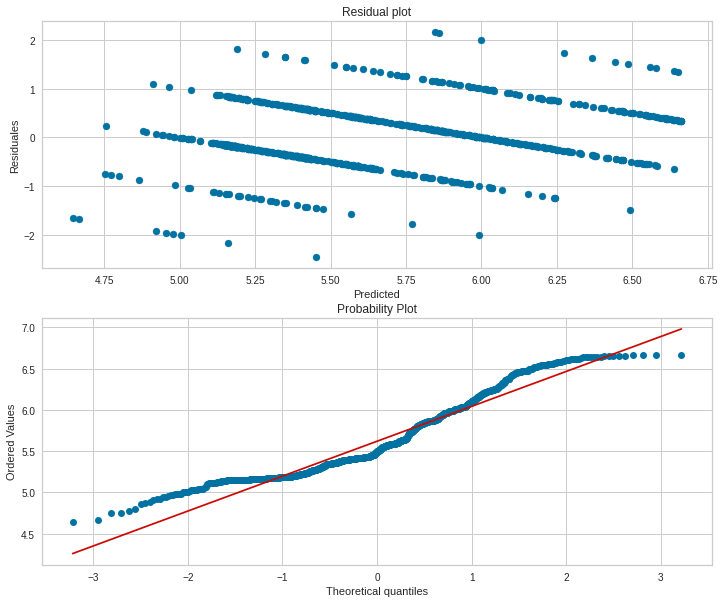


Resultados con datos de validacion



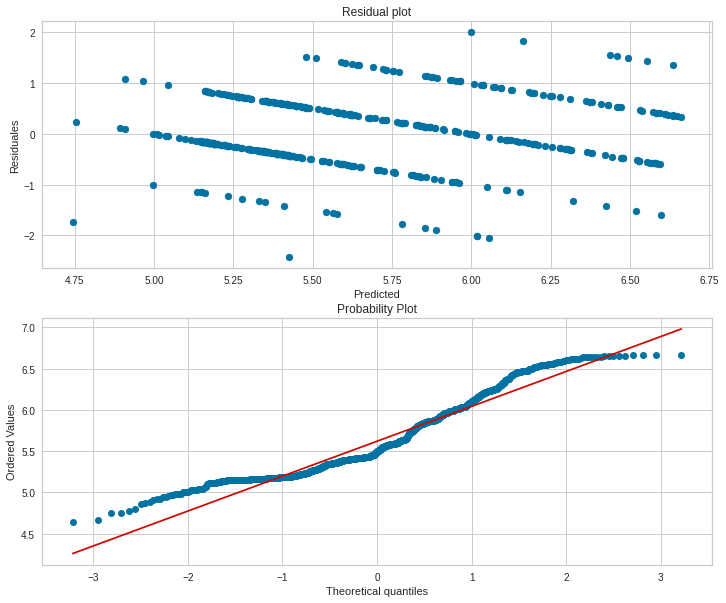

In [61]:
# Instanciamos regresion con random forest
rf = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=3)

# Ajustamos los datos a regresion linear
rf.fit(X_train, y_train)

# Creamos predicciones sobre set de entrenamiento y validacion
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

# Calculamos metricas - r2
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)
print(f"R2 en datos de entrenamiento: {round(r2_train, 3)}")
print(f"R2 en datos de validacion: {round(r2_test, 3)}")

# Agregamos un espacio para claridad en resultados
print("\n")

# Calculamos metricas - mse
mse_train = mean_squared_error(y_train, pred_train)
mse_test =  mean_squared_error(y_test, pred_test)
print(f"MSE en datos de entrenamiento: {round(mse_train, 3)}")
print(f"MSE en datos de validacion: {round(mse_test, 3)}")

# Grafiquemos los resultados de la regresion
print("\nResultados con datos de entrenamiento\n")
getDiagnosticsPlots(rf, X_train, y_train)

print("\nResultados con datos de validacion\n")
getDiagnosticsPlots(rf, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


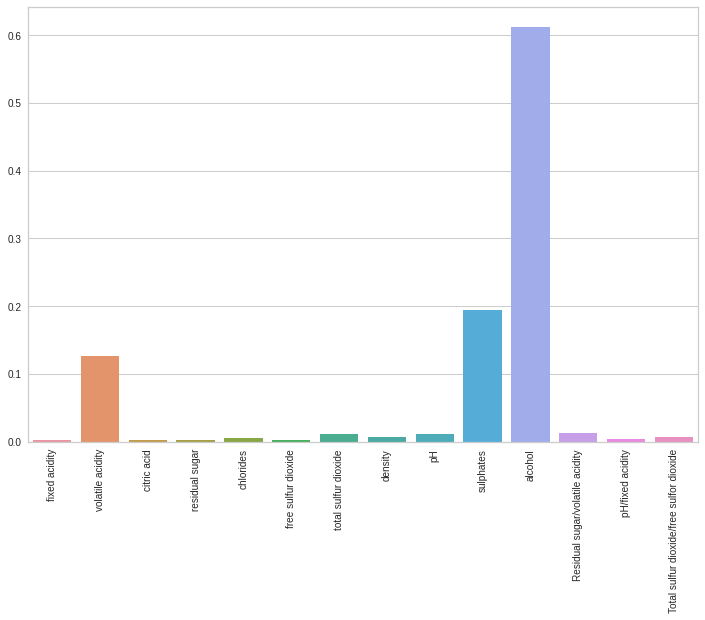

In [63]:
#### Datito del random forest!
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(X.columns, rf.feature_importances_, ax=ax)

degrees = 90
plt.xticks(rotation=degrees)
plt.show()

[1]	valid_0's l2: 0.626672	valid_0's l2: 0.626672
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.598694	valid_0's l2: 0.598694
[3]	valid_0's l2: 0.574771	valid_0's l2: 0.574771
[4]	valid_0's l2: 0.553801	valid_0's l2: 0.553801
[5]	valid_0's l2: 0.534273	valid_0's l2: 0.534273
[6]	valid_0's l2: 0.520997	valid_0's l2: 0.520997
[7]	valid_0's l2: 0.509363	valid_0's l2: 0.509363
[8]	valid_0's l2: 0.50025	valid_0's l2: 0.50025
[9]	valid_0's l2: 0.490565	valid_0's l2: 0.490565
[10]	valid_0's l2: 0.481756	valid_0's l2: 0.481756
[11]	valid_0's l2: 0.474384	valid_0's l2: 0.474384
[12]	valid_0's l2: 0.467304	valid_0's l2: 0.467304
[13]	valid_0's l2: 0.461685	valid_0's l2: 0.461685
[14]	valid_0's l2: 0.45637	valid_0's l2: 0.45637
[15]	valid_0's l2: 0.452165	valid_0's l2: 0.452165
[16]	valid_0's l2: 0.4491	valid_0's l2: 0.4491
[17]	valid_0's l2: 0.445848	valid_0's l2: 0.445848
[18]	valid_0's l2: 0.442081	valid_0's l2: 0.442081
[19]	valid_0's l2: 0.440589	valid_0's 

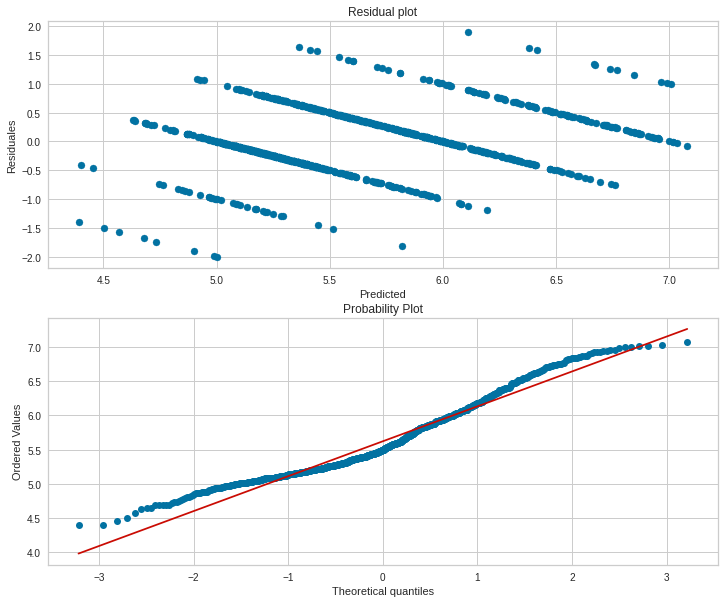


Resultados con datos de validacion



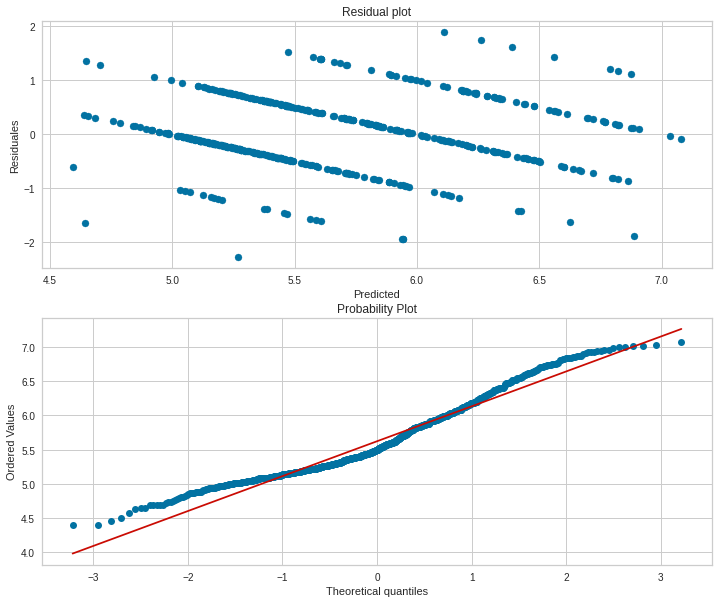

In [66]:
# Instanciamos regresion con LightGBM
lgb = LGBMRegressor(random_state=42, max_depth=3, n_estimators=1000)

# Ajustamos los datos a regresion
lgb.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=5, eval_metric="mse")

# Creamos predicciones sobre set de entrenamiento y validacion
pred_train = lgb.predict(X_train)
pred_test = lgb.predict(X_test)

# Calculamos metricas - r2
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)
print(f"R2 en datos de entrenamiento: {round(r2_train, 3)}")
print(f"R2 en datos de validacion: {round(r2_test, 3)}")

# Agregamos un espacio para claridad en resultados
print("\n")

# Calculamos metricas - mse
mse_train = mean_squared_error(y_train, pred_train)
mse_test =  mean_squared_error(y_test, pred_test)
print(f"MSE en datos de entrenamiento: {round(mse_train, 3)}")
print(f"MSE en datos de validacion: {round(mse_test, 3)}")

# Grafiquemos los resultados de la regresion
print("\nResultados con datos de entrenamiento\n")
getDiagnosticsPlots(lgb, X_train, y_train)

print("\nResultados con datos de validacion\n")
getDiagnosticsPlots(lgb, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


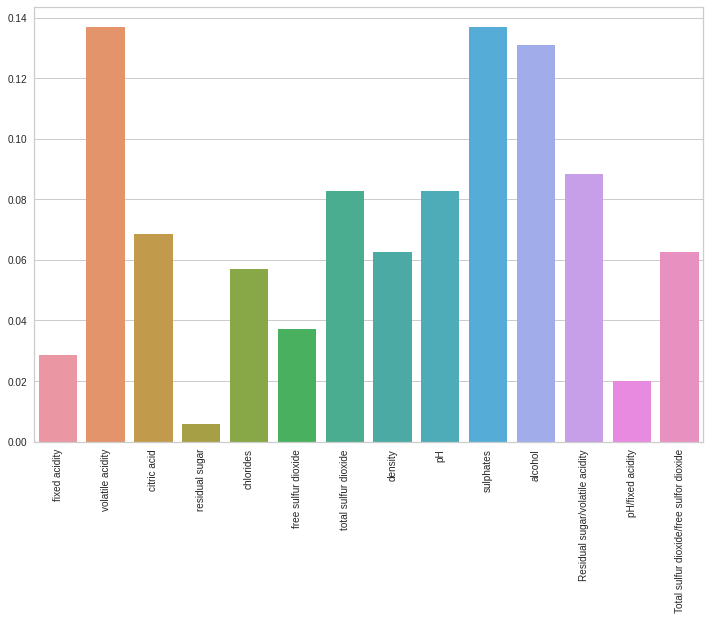

In [67]:
#### Datito del random forest!
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(X.columns, lgb.feature_importances_/sum(lgb.feature_importances_), ax=ax)

degrees = 90
plt.xticks(rotation=degrees)
plt.show()

#### Tratemos los outliers

In [69]:
# Columnas a imputar outliers
to_impute = ["fixed acidity",
"volatile acidity",
"chlorides",
"total sulfur dioxide",
"sulphates"
]

# Iniciar un diccionario para imputar outliers
impute_dict = {col:[] for col in to_impute}
              
# Bucle para obtener quantiles de variables
for col in to_impute:
    impute_dict[col] = np.quantile(X_train[col], .99)

# Bucle para imputar posibles outliers
for col in to_impute:
    
    # Imputar posibles outliers del set de entrenamiento
    ix = X_train[col] > impute_dict[col]
    X_train.loc[ix, col] = impute_dict[col]
    
    # Imputar posibles outliers del set de validacion
    ix = X_test[col] > impute_dict[col]
    X_test.loc[ix, col] = impute_dict[col]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


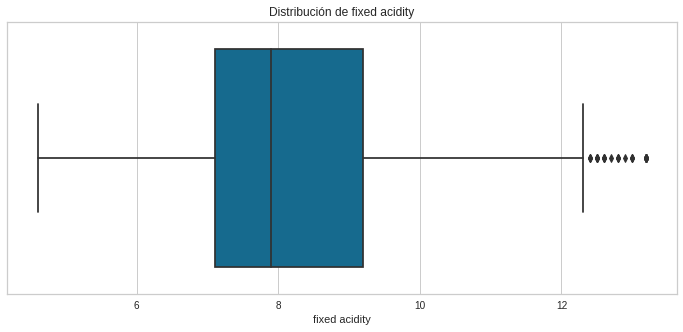

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


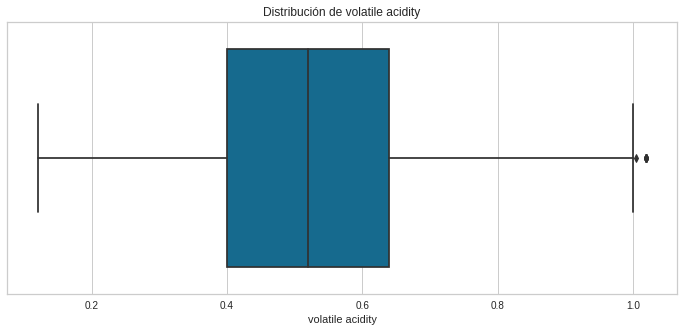

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


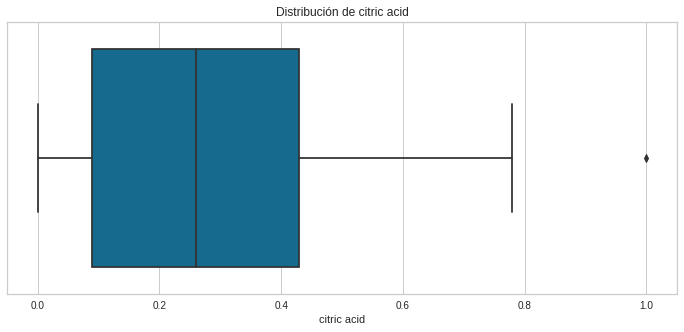

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


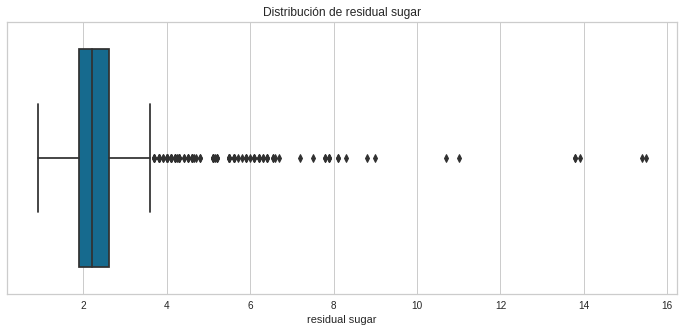

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


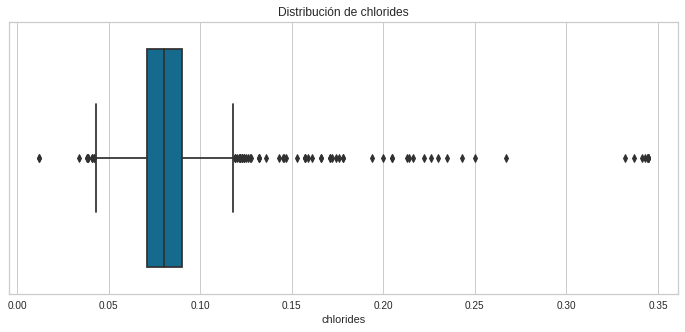

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


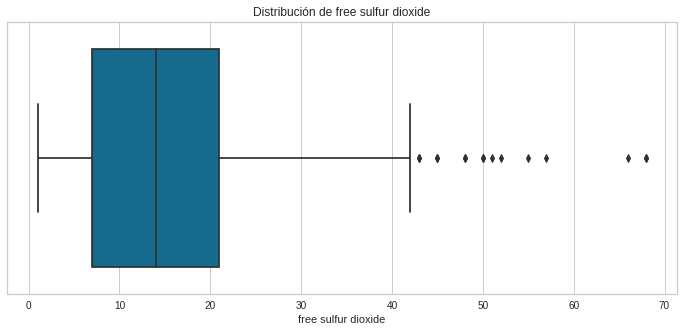

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


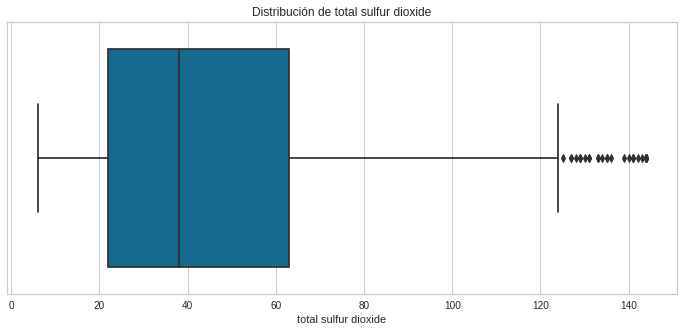

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


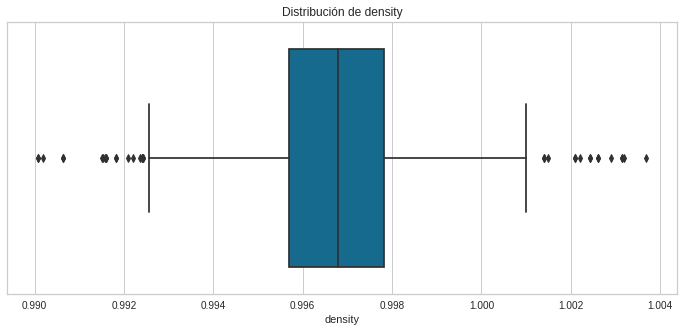

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


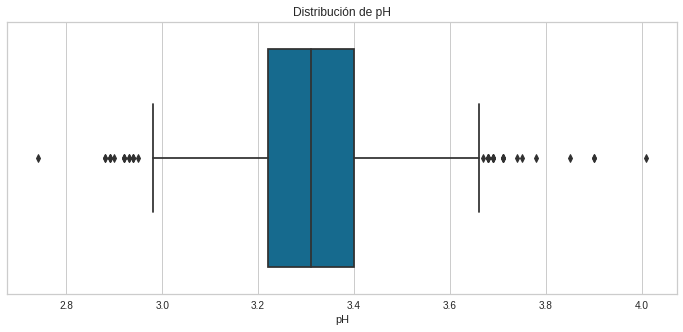

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


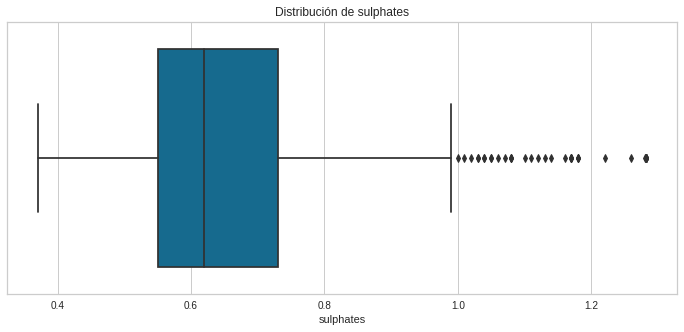

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


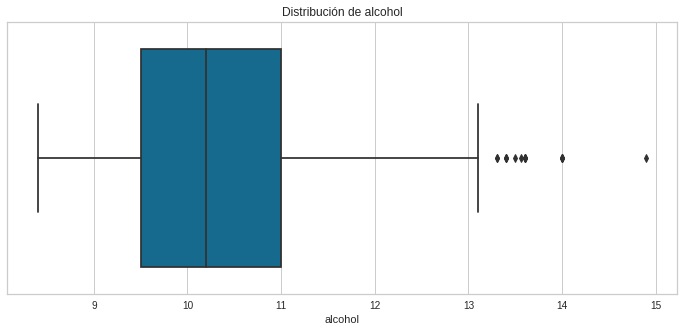

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


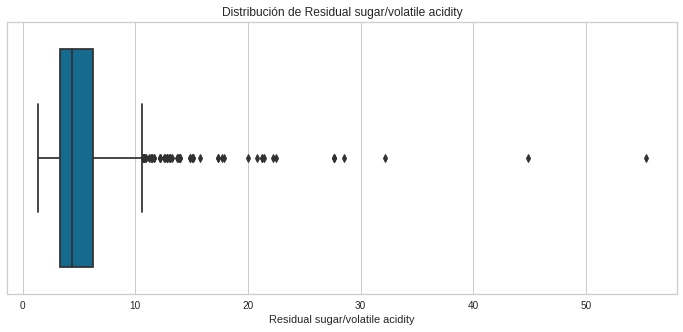

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


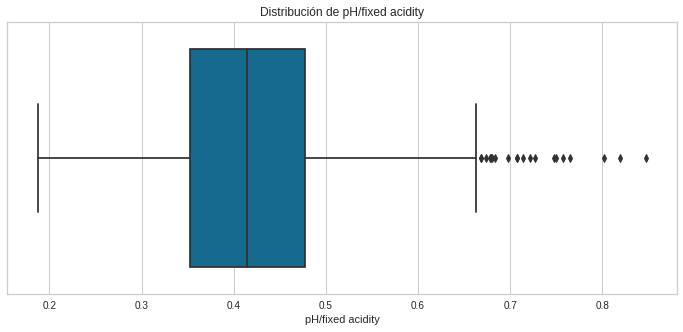

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


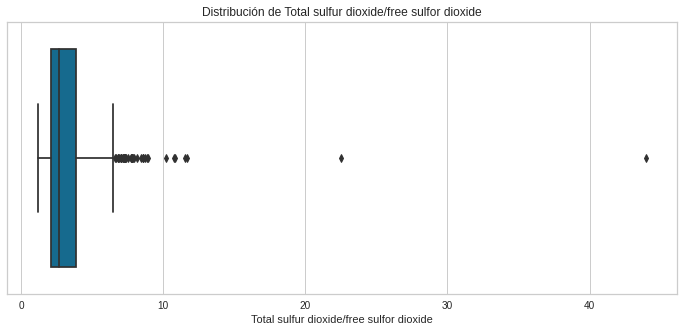

In [70]:
# Bucle para graficar la distribucion de todas las variables utilizando funcion getBoxplot
for col in X_train.columns:
    getBoxplot(X_train, col)

#### Intentemos modelar con outliers reemplazados

In [72]:
# Funcion para dejar todas las variables en la misma escala
from sklearn.preprocessing import StandardScaler

In [73]:
# Dejemos todas las variables en la misma escala
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

R2 en datos de entrenamiento: 0.367
R2 en datos de validacion: 0.355


MSE en datos de entrenamiento: 0.409
MSE en datos de validacion: 0.427

Resultados con datos de entrenamiento



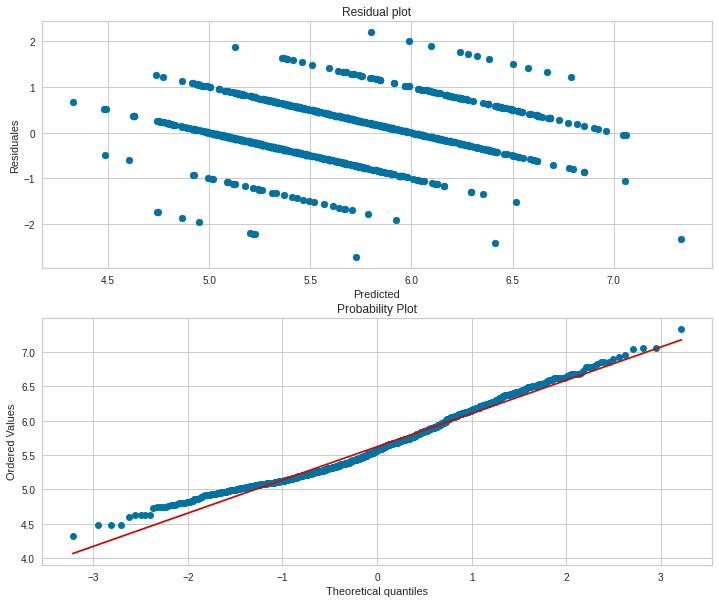


Resultados con datos de validacion



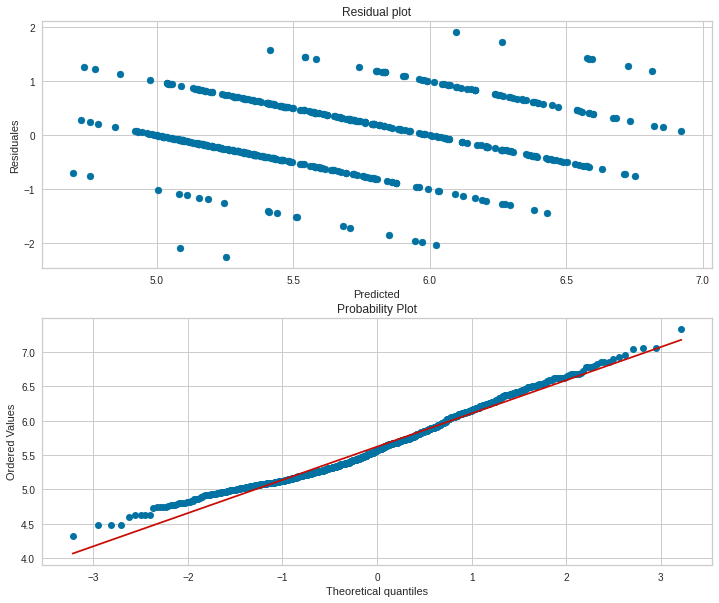

In [74]:
# Instanciamos regresion linear
reglin = LinearRegression()

# Ajustamos los datos a regresion linear
reglin.fit(X_train, y_train)

# Creamos predicciones sobre set de entrenamiento y validacion
pred_train = reglin.predict(X_train)
pred_test = reglin.predict(X_test)

# Calculamos metricas - r2
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)
print(f"R2 en datos de entrenamiento: {round(r2_train, 3)}")
print(f"R2 en datos de validacion: {round(r2_test, 3)}")

# Agregamos un espacio para claridad en resultados
print("\n")

# Calculamos metricas - mse
mse_train = mean_squared_error(y_train, pred_train)
mse_test =  mean_squared_error(y_test, pred_test)
print(f"MSE en datos de entrenamiento: {round(mse_train, 3)}")
print(f"MSE en datos de validacion: {round(mse_test, 3)}")
 
# Grafiquemos los resultados de la regresion
print("\nResultados con datos de entrenamiento\n")
getDiagnosticsPlots(reglin, X_train, y_train)

print("\nResultados con datos de validacion\n")
getDiagnosticsPlots(reglin, X_test, y_test)

R2 en datos de entrenamiento: 0.375
R2 en datos de validacion: 0.238


MSE en datos de entrenamiento: 0.404
MSE en datos de validacion: 0.505

Resultados con datos de entrenamiento



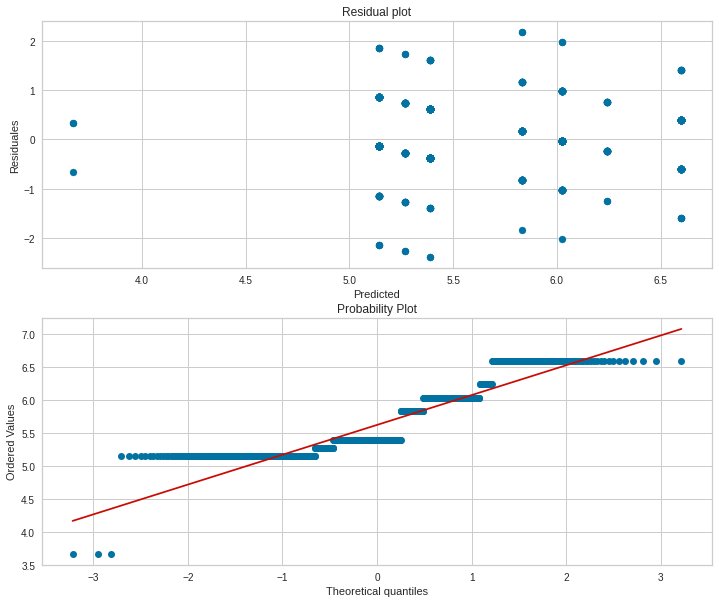


Resultados con datos de validacion



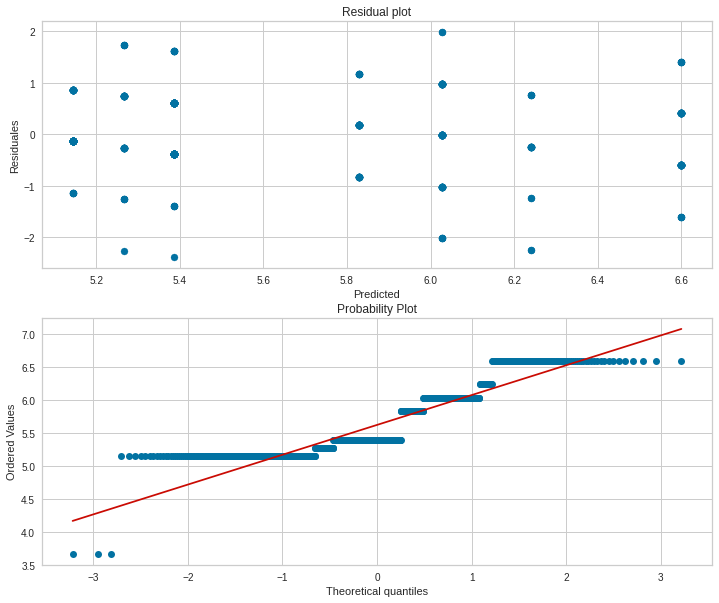

In [75]:
# Instanciamos regresion con arbol de decisiones
tree = DecisionTreeRegressor(random_state=42,max_depth=3)

# Ajustamos los datos a regresion linear
tree.fit(X_train, y_train)

# Creamos predicciones sobre set de entrenamiento y validacion
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

# Calculamos metricas - r2
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)
print(f"R2 en datos de entrenamiento: {round(r2_train, 3)}")
print(f"R2 en datos de validacion: {round(r2_test, 3)}")

# Agregamos un espacio para claridad en resultados
print("\n")

# Calculamos metricas - mse
mse_train = mean_squared_error(y_train, pred_train)
mse_test =  mean_squared_error(y_test, pred_test)
print(f"MSE en datos de entrenamiento: {round(mse_train, 3)}")
print(f"MSE en datos de validacion: {round(mse_test, 3)}")

# Grafiquemos los resultados de la regresion
print("\nResultados con datos de entrenamiento\n")
getDiagnosticsPlots(tree, X_train, y_train)

print("\nResultados con datos de validacion\n")
getDiagnosticsPlots(tree, X_test, y_test)

R2 en datos de entrenamiento: 0.426
R2 en datos de validacion: 0.313


MSE en datos de entrenamiento: 0.371
MSE en datos de validacion: 0.455

Resultados con datos de entrenamiento



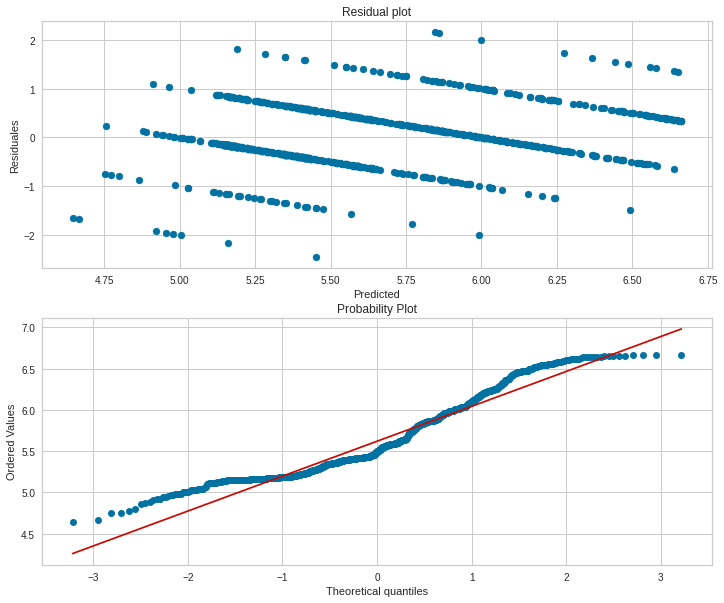


Resultados con datos de validacion



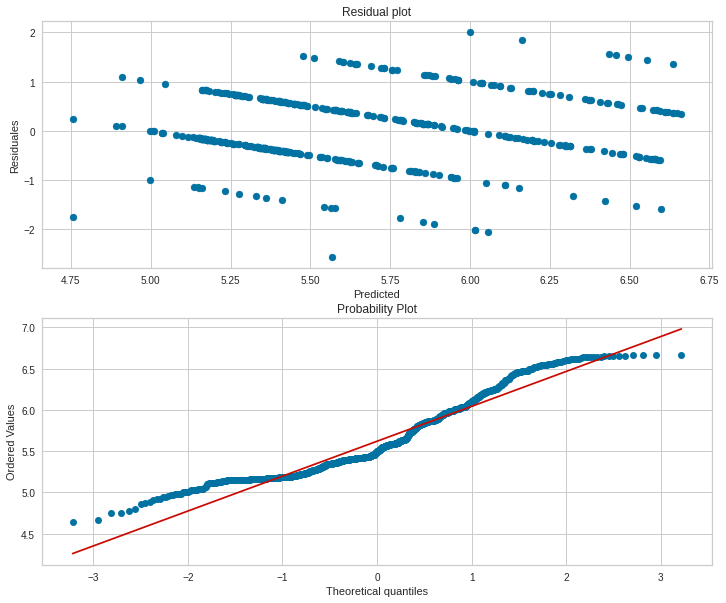

In [76]:
# Instanciamos regresion con random forest
rf = RandomForestRegressor(random_state=42, max_depth=3)

# Ajustamos los datos a regresion linear
rf.fit(X_train, y_train)

# Creamos predicciones sobre set de entrenamiento y validacion
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

# Calculamos metricas - r2
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)
print(f"R2 en datos de entrenamiento: {round(r2_train, 3)}")
print(f"R2 en datos de validacion: {round(r2_test, 3)}")

# Agregamos un espacio para claridad en resultados
print("\n")

# Calculamos metricas - mse
mse_train = mean_squared_error(y_train, pred_train)
mse_test =  mean_squared_error(y_test, pred_test)
print(f"MSE en datos de entrenamiento: {round(mse_train, 3)}")
print(f"MSE en datos de validacion: {round(mse_test, 3)}")

# Grafiquemos los resultados de la regresion
print("\nResultados con datos de entrenamiento\n")
getDiagnosticsPlots(rf, X_train, y_train)

print("\nResultados con datos de validacion\n")
getDiagnosticsPlots(rf, X_test, y_test)

[1]	valid_0's l2: 0.626672	valid_0's l2: 0.626672
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.598694	valid_0's l2: 0.598694
[3]	valid_0's l2: 0.574771	valid_0's l2: 0.574771
[4]	valid_0's l2: 0.553801	valid_0's l2: 0.553801
[5]	valid_0's l2: 0.534273	valid_0's l2: 0.534273
[6]	valid_0's l2: 0.520997	valid_0's l2: 0.520997
[7]	valid_0's l2: 0.509536	valid_0's l2: 0.509536
[8]	valid_0's l2: 0.498518	valid_0's l2: 0.498518
[9]	valid_0's l2: 0.488317	valid_0's l2: 0.488317
[10]	valid_0's l2: 0.480038	valid_0's l2: 0.480038
[11]	valid_0's l2: 0.472147	valid_0's l2: 0.472147
[12]	valid_0's l2: 0.465113	valid_0's l2: 0.465113
[13]	valid_0's l2: 0.459845	valid_0's l2: 0.459845
[14]	valid_0's l2: 0.455246	valid_0's l2: 0.455246
[15]	valid_0's l2: 0.45214	valid_0's l2: 0.45214
[16]	valid_0's l2: 0.449027	valid_0's l2: 0.449027
[17]	valid_0's l2: 0.444763	valid_0's l2: 0.444763
[18]	valid_0's l2: 0.44103	valid_0's l2: 0.44103
[19]	valid_0's l2: 0.439711	valid_

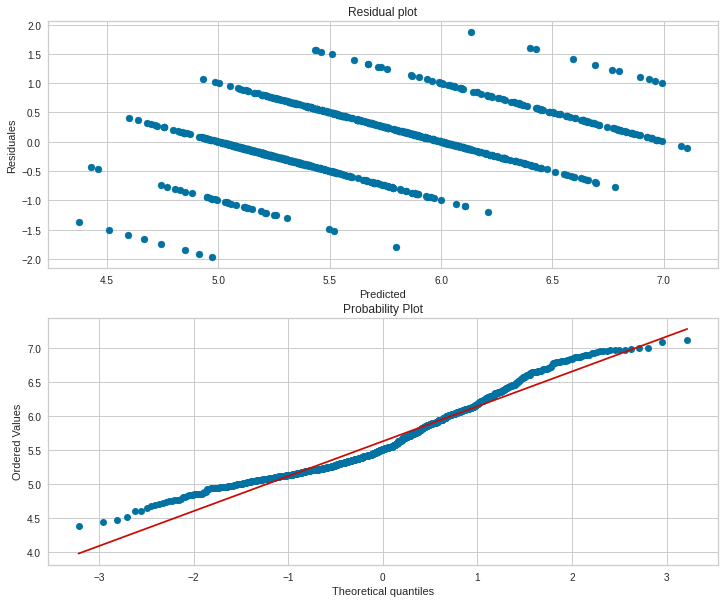


Resultados con datos de validacion



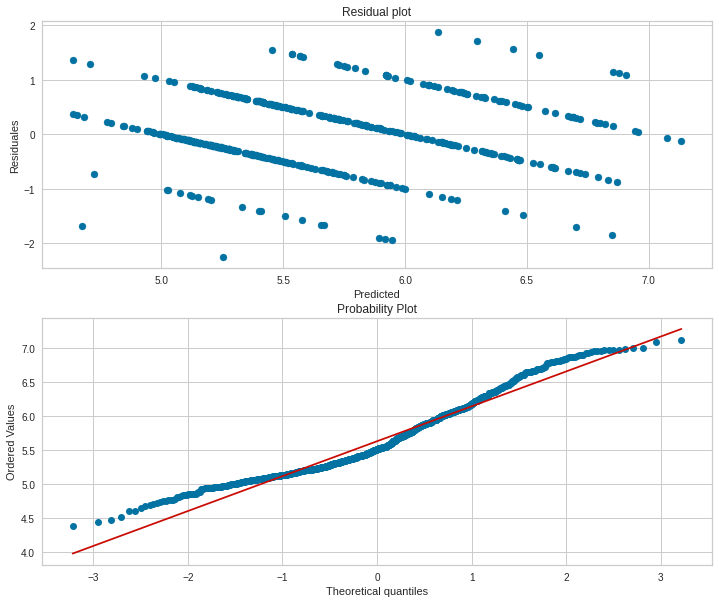

In [77]:
# Instanciamos regresion con LightGBM
lgb = LGBMRegressor(random_state=42, max_depth=3, n_estimators=1000)

# Ajustamos los datos a regresion
lgb.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=5, eval_metric="mse")

# Creamos predicciones sobre set de entrenamiento y validacion
pred_train = lgb.predict(X_train)
pred_test = lgb.predict(X_test)

# Calculamos metricas - r2
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)
print(f"R2 en datos de entrenamiento: {round(r2_train, 3)}")
print(f"R2 en datos de validacion: {round(r2_test, 3)}")

# Agregamos un espacio para claridad en resultados
print("\n")

# Calculamos metricas - mse
mse_train = mean_squared_error(y_train, pred_train)
mse_test =  mean_squared_error(y_test, pred_test)
print(f"MSE en datos de entrenamiento: {round(mse_train, 3)}")
print(f"MSE en datos de validacion: {round(mse_test, 3)}")

# Grafiquemos los resultados de la regresion
print("\nResultados con datos de entrenamiento\n")
getDiagnosticsPlots(lgb, X_train, y_train)

print("\nResultados con datos de validacion\n")
getDiagnosticsPlots(lgb, X_test, y_test)

#### Ajustemos algunos hiperparametros

In [78]:
from sklearn.model_selection import GridSearchCV

In [80]:
# Especificamos cuadricula de busqueda de parametros
param_grid = {'max_depth': range(2,20,2),
              'n_estimators': range(10,110, 10),
              'min_samples_split': range(2,16,2),
              'min_samples_leaf': [1, 2, 4],
              'criterion': ['friedman_mse', 'mse'],
             'max_features': ['sqrt'],
             'bootstrap': [True, False]}

# Instanciamos el base y el de busqueda de parametros
rf = RandomForestRegressor(random_state=42)
rf_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = -1)

# Ajustar modelo de busqueda de parametros
rf_search.fit(X_train, y_train)

# Verificar mejores parametros
rf_search.best_params_

Fitting 3 folds for each of 7560 candidates, totalling 22680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 5828 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 6841 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 7934 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 9109 tasks      | 

{'bootstrap': False,
 'criterion': 'friedman_mse',
 'max_depth': 16,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 50}

R2 en datos de entrenamiento: 0.99
R2 en datos de validacion: 0.468


MSE en datos de entrenamiento: 0.006
MSE en datos de validacion: 0.352

Resultados con datos de entrenamiento



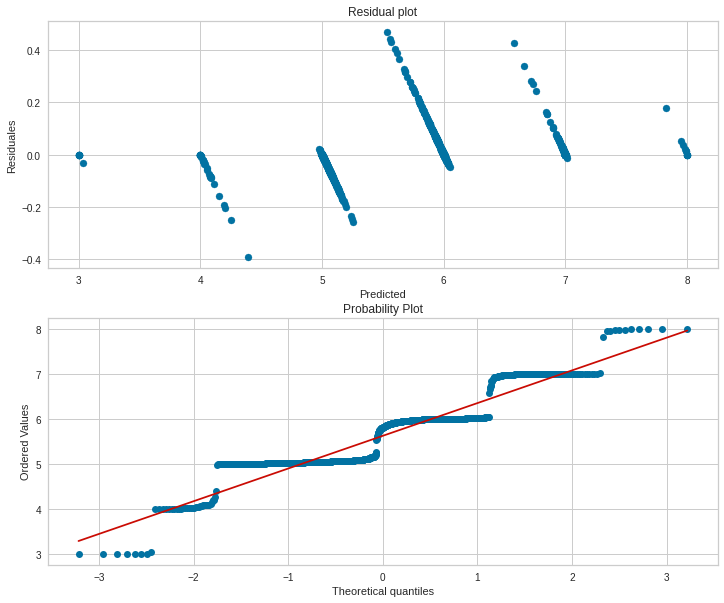


Resultados con datos de validacion



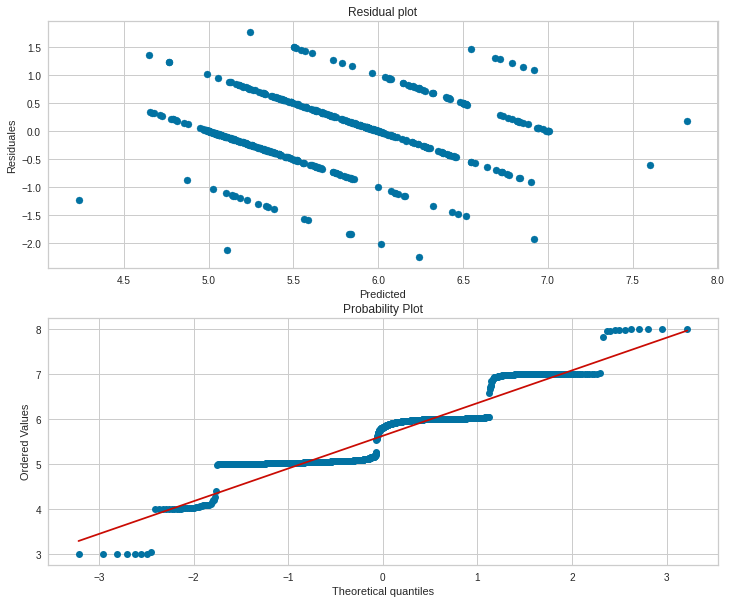

In [35]:
# Creamos predicciones sobre set de entrenamiento y validacion
pred_train = rf_search.best_estimator_.predict(X_train)
pred_test = rf_search.best_estimator_.predict(X_test)

# Calculamos metricas - r2
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)
print(f"R2 en datos de entrenamiento: {round(r2_train, 3)}")
print(f"R2 en datos de validacion: {round(r2_test, 3)}")

# Agregamos un espacio para claridad en resultados
print("\n")

# Calculamos metricas - mse
mse_train = mean_squared_error(y_train, pred_train)
mse_test =  mean_squared_error(y_test, pred_test)
print(f"MSE en datos de entrenamiento: {round(mse_train, 3)}")
print(f"MSE en datos de validacion: {round(mse_test, 3)}")

# Grafiquemos los resultados de la regresion
print("\nResultados con datos de entrenamiento\n")
getDiagnosticsPlots(rf_search.best_estimator_, X_train, y_train)

print("\nResultados con datos de validacion\n")
getDiagnosticsPlots(rf_search.best_estimator_, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


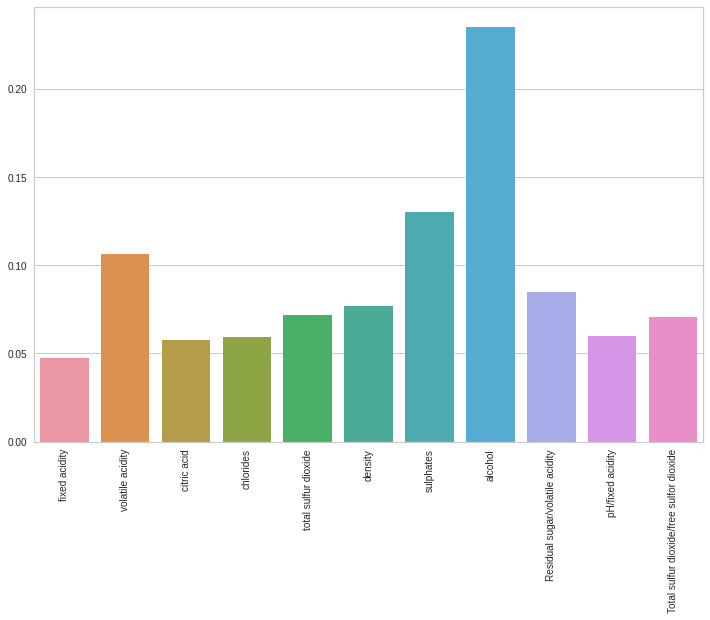

In [36]:
#### Datito del random forest!
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(X.columns, rf_search.best_estimator_.feature_importances_, ax=ax)

degrees = 90
plt.xticks(rotation=degrees)
plt.show()

#### BONO, Tensorflow y redes neuronales

In [37]:
import tensorflow as tf

In [38]:
# Capa de ingesta de datos
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))

# Capa densa - todos los nodos conectados
dense_layer_1 = tf.keras.layers.Dense(16, activation='relu')(input_layer)

# Capa densa - todos los nodos conectados
dense_layer_2 = tf.keras.layers.Dense(16, activation='relu')(dense_layer_1)

# Capa de output
output = tf.keras.layers.Dense(1)(dense_layer_2)

# Compilar modelo
model = tf.keras.models.Model(inputs=input_layer, outputs=output)
model.compile(loss='mse', optimizer='adam')

In [39]:
# Imprimir resumen de modelo
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Entrenamos la red neuronal
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
134/134 [==============================] - 1s 5ms/step - loss: 22.3763 - val_loss: 4.6149
Epoch 2/50
134/134 [==============================] - 0s 2ms/step - loss: 3.4776 - val_loss: 2.2138
Epoch 3/50
134/134 [==============================] - 0s 2ms/step - loss: 2.0084 - val_loss: 1.6672
Epoch 4/50
134/134 [==============================] - 0s 2ms/step - loss: 1.4717 - val_loss: 1.3800
Epoch 5/50
134/134 [==============================] - 0s 2ms/step - loss: 1.4808 - val_loss: 1.2210
Epoch 6/50
134/134 [==============================] - 0s 2ms/step - loss: 1.1016 - val_loss: 1.0558
Epoch 7/50
134/134 [==============================] - 0s 2ms/step - loss: 1.0799 - val_loss: 0.9403
Epoch 8/50
134/134 [==============================] - 0s 2ms/step - loss: 0.9550 - val_loss: 0.8550
Epoch 9/50
134/134 [==============================] - 0s 2ms/step - loss: 0.8076 - val_loss: 0.7955
Epoch 10/50
134/134 [==============================] - 0s 2ms/step - loss: 0.7308 - val_loss: 0.758

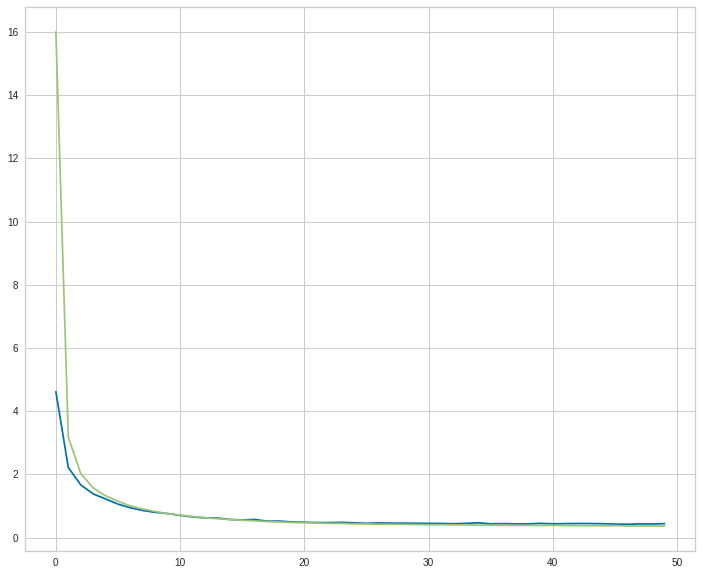

In [41]:
fig, ax = plt.subplots(figsize=(12,10))

ax.plot(history.history['val_loss'])
ax.plot(history.history['loss'])

In [42]:
# Hacemos predicciones
pred_train = model.predict(X_train) 
pred_test = model.predict(X_test)

# Calculamos metricas - r2
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)
print(f"R2 en datos de entrenamiento: {round(r2_train, 3)}")
print(f"R2 en datos de validacion: {round(r2_test, 3)}")

# Agregamos un espacio para claridad en resultados
print("\n")

# Calculamos metricas - mse
mse_train = mean_squared_error(y_train, pred_train)
mse_test =  mean_squared_error(y_test, pred_test)
print(f"MSE en datos de entrenamiento: {round(mse_train, 3)}")
print(f"MSE en datos de validacion: {round(mse_test, 3)}")

R2 en datos de entrenamiento: 0.45
R2 en datos de validacion: 0.338


MSE en datos de entrenamiento: 0.355
MSE en datos de validacion: 0.438
